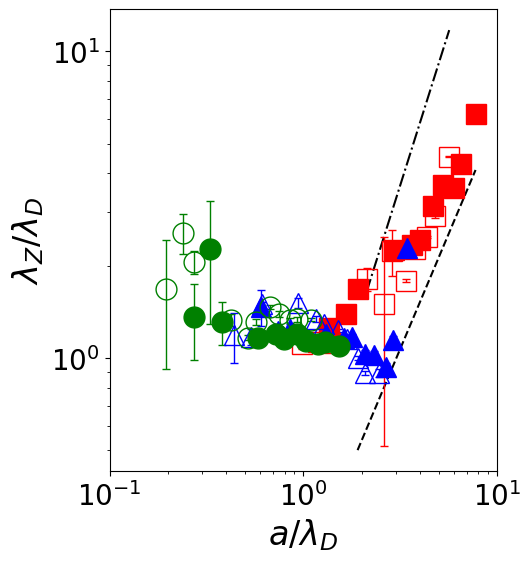

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# ---------- Load reference x-data (a/λ_D) ---------- #
x_df = pd.read_csv("a_lambda_d.csv")

# ---------- Color & marker mapping for MD ---------- #
color_map = {'0.2': 'red', '1': 'blue', '5': 'green'}
marker_map = {'0.2': 's', '1': '^', '5': 'o'}

fig, ax = plt.subplots(figsize=(5, 6))

def power_func(x, A, alpha):
    return A * x**alpha

# ---------- Now loop MD + LD datasets ---------- #
for dtype in ['MD', 'LD']:      # NEW
    for eps in ['0.2', '1', '5']:
        for pot in ['LJ', 'WCA']:

            fname = f"zzfit_params_{dtype}_{eps}_{pot}.csv"
            df = pd.read_csv(fname)

            # --- x = a / λ_D --- #
            x = np.array(x_df[f"{eps}_{pot}"])

            # --- y = λ_fit / λ_D --- #
            y = df["lambda_fit"].to_numpy() * x

            # --- Error propagation --- #
            lambda_fit = df["lambda_fit"].to_numpy()
            lambda_fit_err = df["lambda_fit_error"].to_numpy()
            lambda_D = df["lambda_debye"].to_numpy()
            lambda_D_err = np.zeros_like(lambda_D)

            y_err = y * np.sqrt((lambda_fit_err/lambda_fit)**2 +
                                (lambda_D_err/lambda_D)**2)

            # --- Marker style --- #
            filled = (pot == "LJ")

            if dtype == "MD":
                color = color_map[eps]
                zorder_temp = 1000
            else:  # LD dataset
                # color = "black"
                # zorder_temp=1
                continue

            ax.errorbar(
                x, y, yerr=y_err,
                fmt=marker_map[eps],
                markersize=15,
                color=color,
                mfc=color if filled else 'none',
                mec=color,
                ecolor=color,
                elinewidth=1,
                capsize=3,
                label=f"{dtype} {eps} {pot}", zorder = zorder_temp
            )

            # ---------- Fitting only for MD 0.2 LJ/WCA ---------- #
            if dtype == "MD" and eps == '0.2' and pot == 'LJ':
                x_fit_region = x[2:]
                y_fit_region = y[2:]
                popt, pcov = curve_fit(power_func, x_fit_region, y_fit_region)
                A_fit, alpha_fit = popt
                x_fit = np.linspace(min(x_fit_region), max(x_fit_region), 100)
                y_fit = power_func(x_fit, A_fit, 1.5)     # fixed exponent
                ax.plot(x_fit, y_fit*(1/3), '--', color='black')

            elif dtype == "MD" and eps == '0.2' and pot == 'WCA':
                x_fit_region = x[3:]
                y_fit_region = y[3:]
                popt, pcov = curve_fit(power_func, x_fit_region, y_fit_region)
                A_fit, alpha_fit = popt
                x_fit = np.linspace(min(x_fit_region), max(x_fit_region), 100)
                y_fit = power_func(x_fit, A_fit, 2.0)     # fixed exponent
                ax.plot(x_fit, y_fit*(1/1.4), '-.', color='black')


# ---------- Axes ---------- #
ax.set_xscale('log')
ax.set_xlim(0.1, 10)
ax.set_yscale('log')
ax.set_xlabel(r'${a}/{\lambda_D}$', fontsize=24)
ax.set_ylabel(r'${\lambda_Z}/{\lambda_D}$', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)

# ax.legend(fontsize=12)
plt.show()